In this project, I will be performing an unsupervised clustering of data on the customer's records from a groceries firm's database. Customer segmentation is the practice of separating customers into groups that reflect similarities among customers in each cluster. I will divide customers into segments to optimize the significance of each customer to the business. To modify products according to distinct needs and behaviours of the customers. It also helps the business to cater to the concerns of different types of customers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('/customer_segmentation.csv')

Details of Features are as below:

Id: Unique identifier for each individual in the dataset.

Year_Birth: The birth year of the individual.

Education: The highest level of education attained by the individual.

Marital_Status: The marital status of the individual.

Income: The annual income of the individual.

Kidhome: The number of young children in the household.

Teenhome: The number of teenagers in the household.

Dt_Customer: The date when the customer was first enrolled or became a part of the company's database.

Recency: The number of days since the last purchase or interaction.

MntWines: The amount spent on wines.

MntFruits: The amount spent on fruits.

MntMeatProducts: The amount spent on meat products.

MntFishProducts: The amount spent on fish products.

MntSweetProducts: The amount spent on sweet products.

MntGoldProds: The amount spent on gold products.

NumDealsPurchases: The number of purchases made with a discount or as part of a deal.

NumWebPurchases: The number of purchases made through the company's website.

NumCatalogPurchases: The number of purchases made through catalogs.

NumStorePurchases: The number of purchases made in physical stores.

NumWebVisitsMonth: The number of visits to the company's website in a month.

AcceptedCmp3: Binary indicator (1 or 0) whether the individual accepted the third marketing campaign.

AcceptedCmp4: Binary indicator (1 or 0) whether the individual accepted the fourth marketing campaign.

AcceptedCmp5: Binary indicator (1 or 0) whether the individual accepted the fifth marketing campaign.

AcceptedCmp1: Binary indicator (1 or 0) whether the individual accepted the first marketing campaign.

AcceptedCmp2: Binary indicator (1 or 0) whether the individual accepted the second marketing campaign.

Complain: Binary indicator (1 or 0) whether the individual has made a complaint.

Z_CostContact: A constant cost associated with contacting a customer.

Z_Revenue: A constant revenue associated with a successful campaign response.

Response: Binary indicator (1 or 0) whether the individual responded to the
marketing campaign.

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

# **DATA CLEANING**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


We Can Conclude And Note That There Are Null Values In Income, We Will Remove Them


In [7]:
df.dropna(subset='Income',inplace=True)

In [8]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


Dt_Customer that indicates the date a customer joined the database is not parsed as DateTime

I am going to create a feature out of "Dt_Customer" that indicates the number of days a customer is registered in the firm's database. However, in order to keep it simple, I am taking this value relative to the most recent customer in the record

In [9]:
df['dt_Customer']=pd.to_datetime(df['Dt_Customer'],format='%d-%m-%Y')
dates=[]
for i in df['dt_Customer']:
  dates.append(i.date())

print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


Creating a feature ("Customer_For") of the number of days the customers started to shop in the store relative to the last recorded date

In [10]:
days = []
d1 = max(dates)
for i in dates:
    delta = d1 - i
    days.append(delta)
df["Customer_For"] = days
df["Customer_For"] = pd.to_numeric(df["Customer_For"], errors="coerce")

Now we will be exploring the unique values in the categorical features to get a clear idea of the data.

In [11]:
print("Total categories in the feature Marital_Status:\n", df["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", df["Education"].value_counts())

Total categories in the feature Marital_Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person

In [12]:
df['Age'] = 2025 - df['Year_Birth']

Create another feature "Spent" indicating the total amount spent by the customer in various categories over the span of two years.

In [13]:
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

Deriving living situation by marital status "Alone"

In [14]:
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone",
                                                    "Divorced":"Alone", "Single":"Alone",})

Feature indicating total children living in the household

In [15]:
df['Children'] = df["Kidhome"]+df["Teenhome"]

Feature for total members in the house hold

In [16]:
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]

Feature pertaining parenthood

In [17]:
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

Segmenting education levels in three groups

In [18]:
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

Changing variable names of those describing amount spend on products

In [19]:
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

Dropping some of the redundant features

In [20]:
df= df.drop(["Marital_Status", "dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"], axis=1)

In [21]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,3.054423e+16,56.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,1.749036e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,29.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,1.555200e+16,48.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,3.071520e+16,55.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,4.570560e+16,66.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,6.039360e+16,132.000000,2525.000000,3.000000,5.000000,1.000000


The above stats show difference in mean Income and max Income and difference in mean amount spent on products and maximum amount spent on products

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

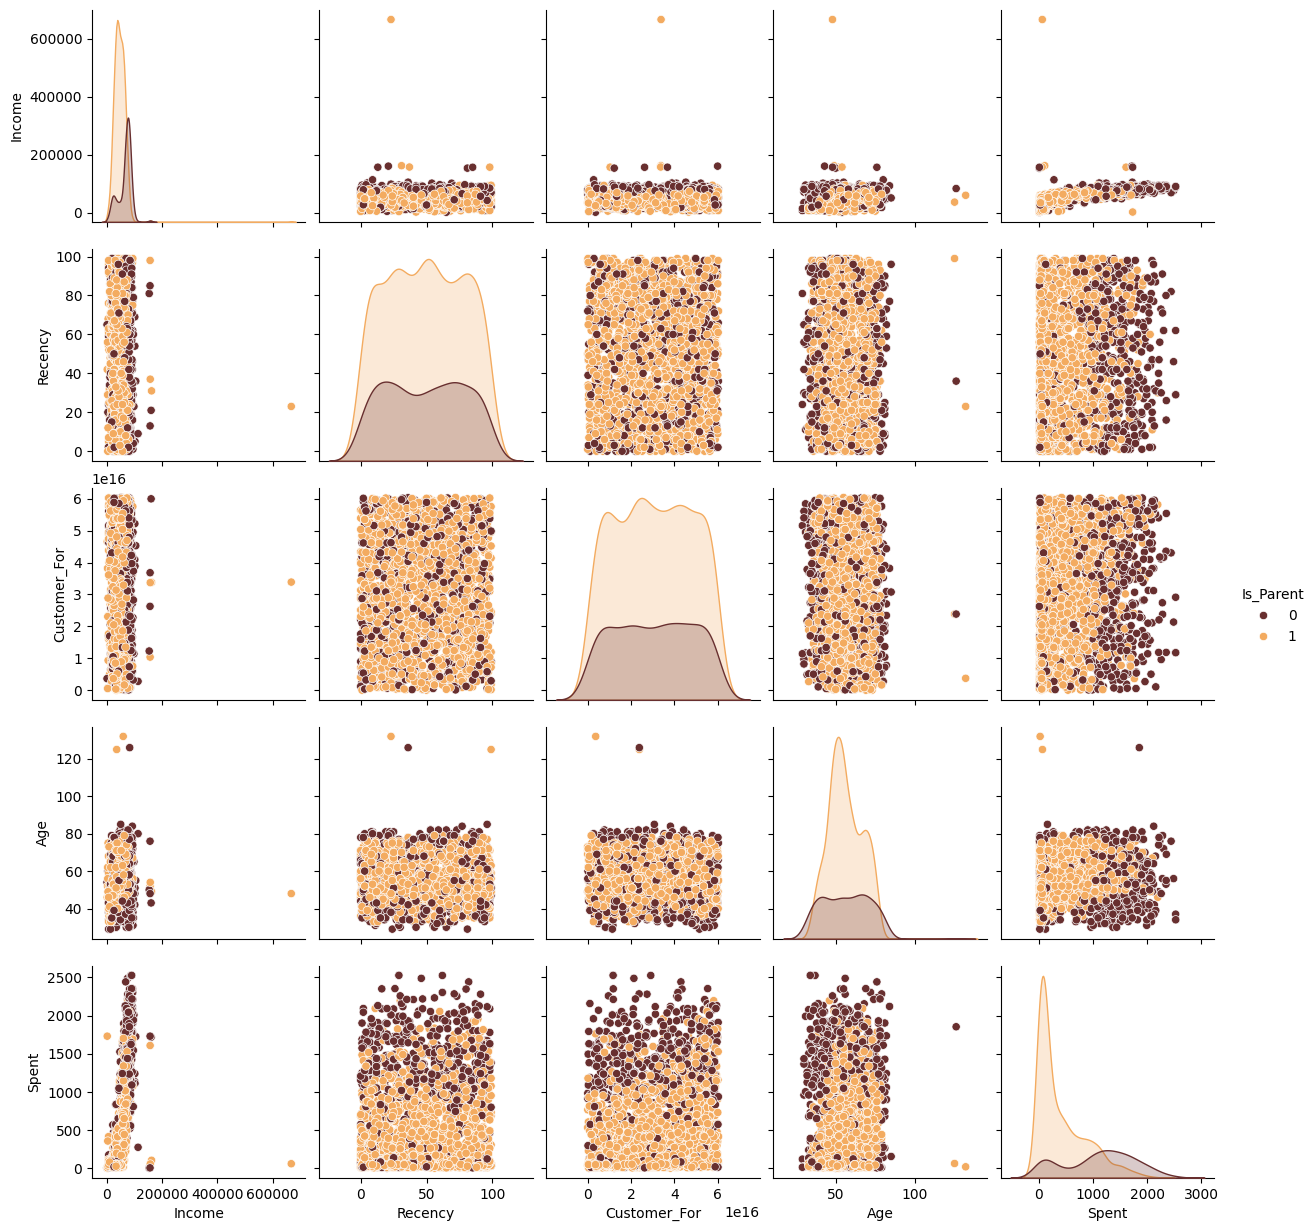

In [22]:
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
plt.show()

We can see there are outliers in Income and age column, we gonna remove that

In [23]:
df['Income'].describe()

,Income
count,2216.000000
mean,52247.251354
std,25173.076661
min,1730.000000
25%,35303.000000
50%,51381.500000
75%,68522.000000
max,666666.000000


In [24]:
Income_IQR = df['Income'].quantile(0.75) - df['Income'].quantile(0.25)
Income_Lower_Limit = df['Income'].quantile(0.25) - (1.5 * Income_IQR)
Income_Upper_Limit = df['Income'].quantile(0.75) + (1.5 * Income_IQR)

df = df[(df['Income'] >= Income_Lower_Limit) & (df['Income'] <= Income_Upper_Limit)]

In [25]:
df['Age'].describe()

,Age
count,2208.000000
mean,56.192935
std,11.991913
min,29.000000
25%,48.000000
50%,55.000000
75%,66.000000
max,132.000000


In [26]:
Age_IQR = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)
Age_Lower_Limit = df['Age'].quantile(0.25) - (1.5 *Age_IQR)
Age_Upper_Limit = df['Age'].quantile(0.75) + (1.5 * Age_IQR)

df = df[(df['Age'] >= Age_Lower_Limit) & (df['Age'] <= Age_Upper_Limit)]

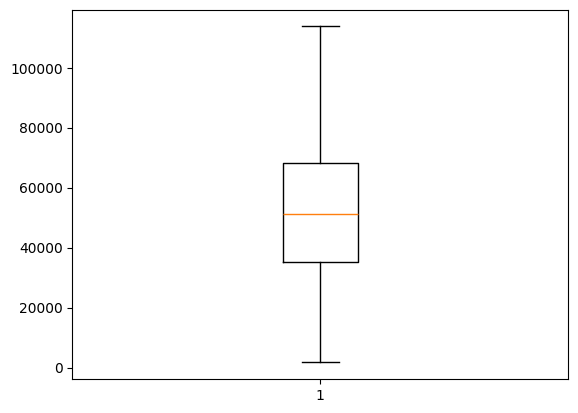

In [27]:
plt.boxplot(df['Income'])
plt.show()

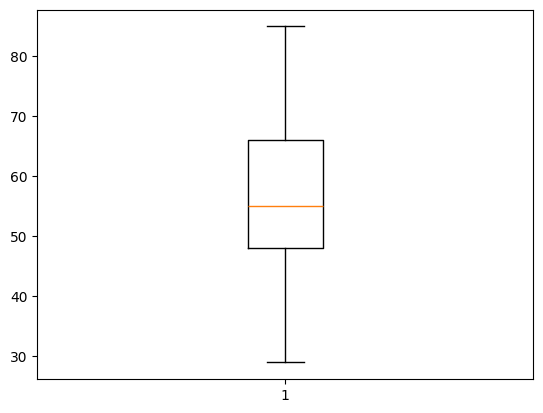

In [28]:
plt.boxplot(df['Age'])
plt.show()

let us look at the correlation amongst the features. (Excluding the categorical attributes at this point)

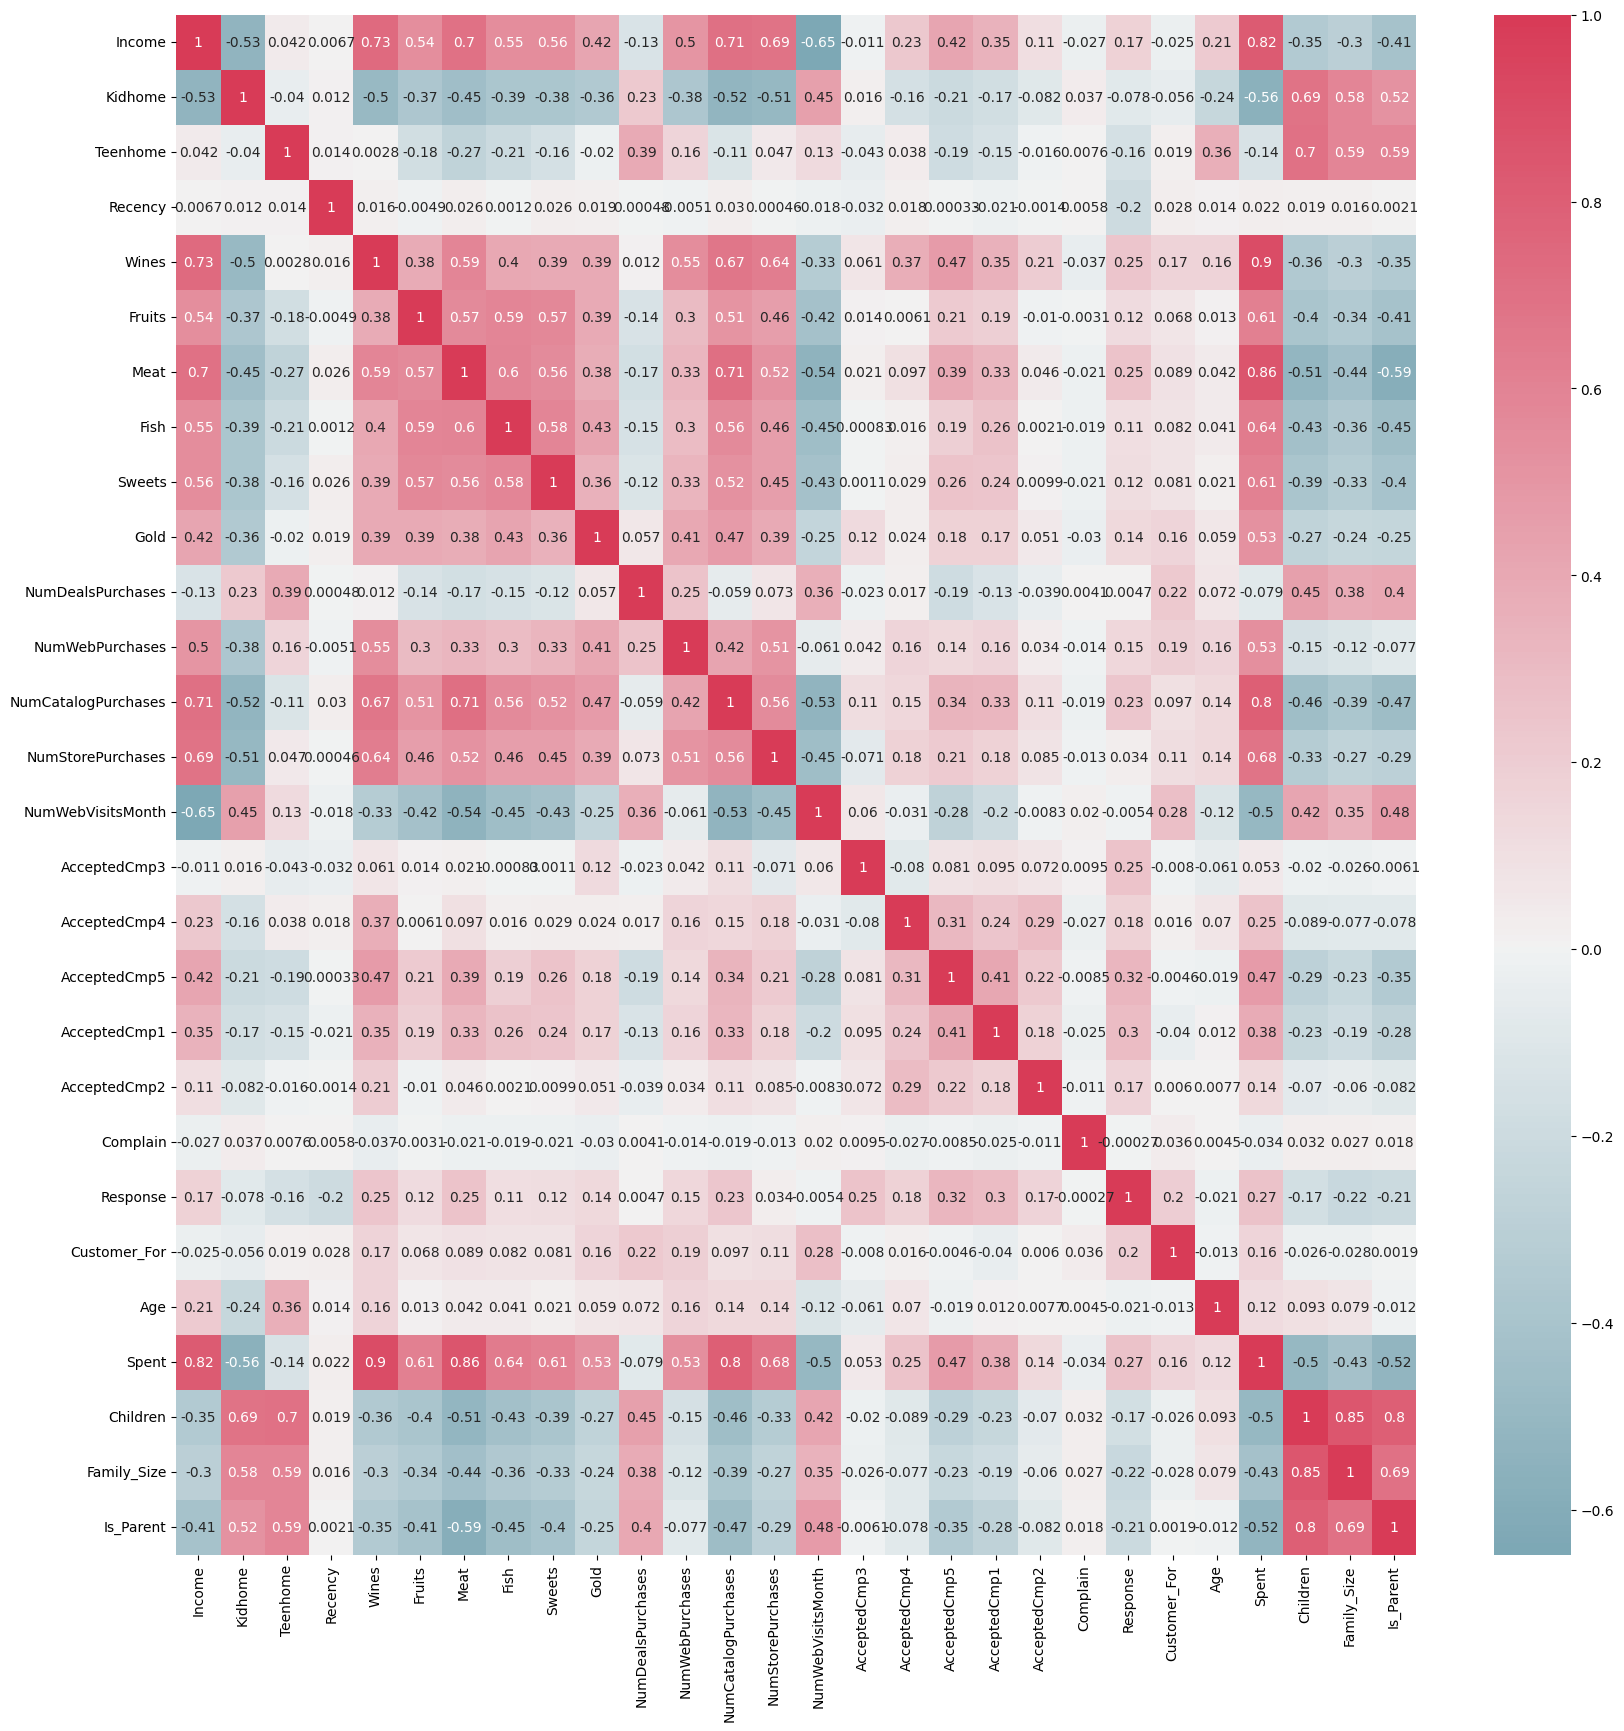

In [29]:
corrmat= df.select_dtypes(include=np.number).corr()
plt.figure(figsize=(20,20))
cmap = sns.diverging_palette(220, 6, as_cmap=True)
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)
plt.show()

# **DATA PRE PROCESSING**

Label encoding the categorical features

In [30]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:",object_cols)

Categorical variables: ['Education', 'Dt_Customer', 'Living_With']


In [31]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
for i in object_cols:
    df[i] = df[[i]].apply(Le.fit_transform)

In [32]:
check_object = []
for i in df.dtypes:
  if i == 'object':
    check_object.append(i)
print(check_object)

[]


In [33]:
ds = df.copy()

In [34]:
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)

STANDARDIZATION OF DATA

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [36]:
scaled_ds.head()

,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.892338,0.314651,-0.823405,-0.930767,-1.310830,0.310830,0.974566,1.548614,1.748400,2.449154,...,2.628526,-0.562650,0.689203,1.527183,1.017189,1.679323,-1.347625,-1.266589,-1.759012,-1.58466
1,-0.892338,-0.254877,1.038757,0.906602,-0.904335,-0.380600,-0.874776,-0.638664,-0.731678,-0.652345,...,-0.588043,-1.179732,-0.139645,-1.188629,1.273530,-0.963897,-1.347625,1.403420,0.448513,0.63105
2,-0.892338,0.965354,-0.823405,-0.930767,0.610783,-0.795458,0.355155,0.568110,-0.175957,1.336263,...,-0.230646,1.288596,-0.554069,-0.205999,0.333612,0.281242,0.742046,-1.266589,-0.655250,-1.58466
3,-0.892338,-1.206087,1.038757,-0.930767,-0.682610,-0.795458,-0.874776,-0.563241,-0.667380,-0.506392,...,-0.945440,-0.562650,0.274779,-1.060245,-1.289883,-0.920675,0.742046,0.068415,0.448513,0.63105
4,0.571654,0.322136,1.038757,-0.930767,0.325708,1.555404,-0.394659,0.417263,-0.217292,0.150396,...,0.126750,0.054432,-0.139645,-0.951612,-1.033542,-0.307248,0.742046,0.068415,0.448513,0.63105


# **DIMENSIONALITY REDUCTION**

In [37]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
pca.fit(scaled_ds)
pca_ds = pd.DataFrame(pca.transform(scaled_ds),columns=['PC1','PC2','PC3'])
pca_ds.describe()

,PC1,PC2,PC3
count,2.205000e+03,2.205000e+03,2.205000e+03
mean,-1.288966e-17,7.089315e-17,-3.625218e-17
std,2.902931e+00,1.715290e+00,1.231428e+00
min,-6.061537e+00,-4.198981e+00,-3.678558e+00
25%,-2.567696e+00,-1.327705e+00,-8.716087e-01
50%,-7.889333e-01,-1.750364e-01,-5.142033e-02
75%,2.417694e+00,1.235861e+00,8.621662e-01
max,7.510978e+00,6.192705e+00,6.860379e+00


3D Projection Of Data In The Reduced Dimension

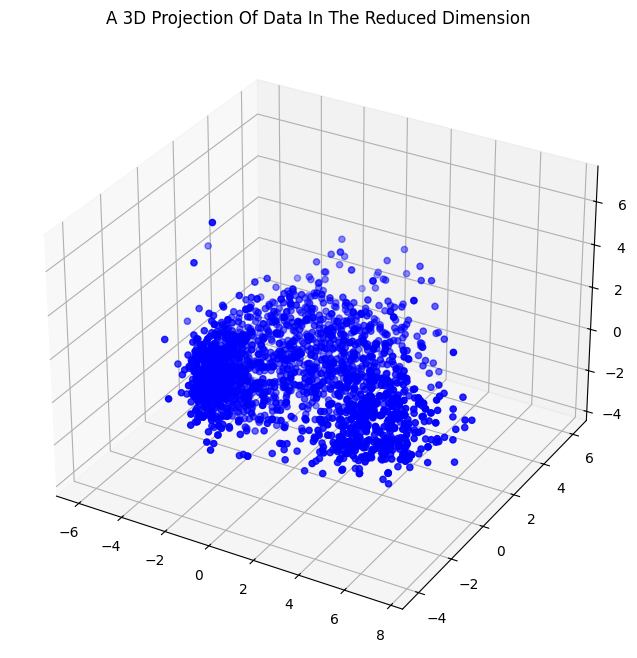

In [38]:
x=pca_ds['PC1']
Y=pca_ds['PC2']
z=pca_ds['PC3']

fig = plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x,Y,z,c='blue',marker='o')
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# **APPLYING CLUSTERING**

Elbow Method to check No. Of Clusters to be formed

In [39]:
!pip install kneed

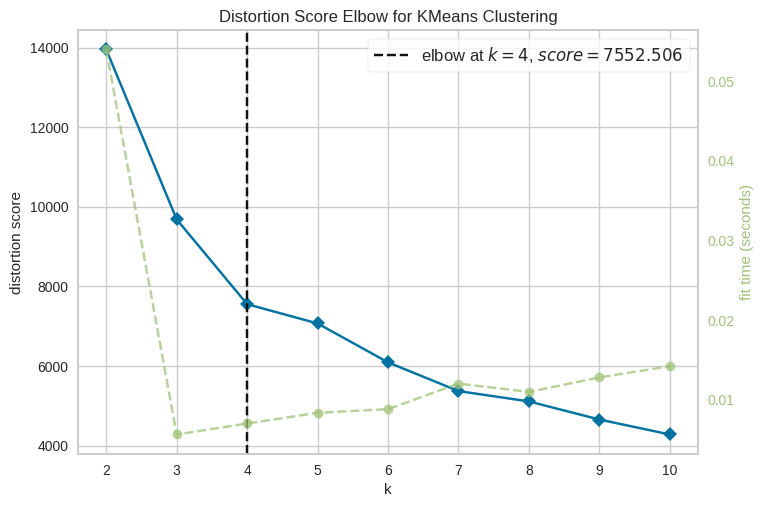

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(pca_ds)
Elbow_M.show()

Applying Agglomerative Clustering

In [41]:
from sklearn.cluster import AgglomerativeClustering
AC = AgglomerativeClustering(n_clusters=4)
yhat_AC = AC.fit_predict(pca_ds)
pca_ds["Clusters"] = yhat_AC

Adding Cluster feature to Original DataFrame

In [42]:
df['Clusters']=yhat_AC

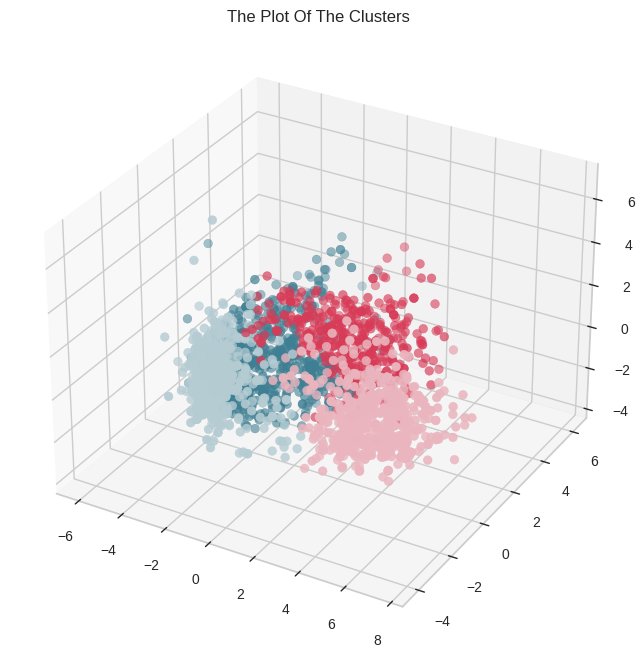

In [43]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, Y, z, s=40, c=pca_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

# **MODEL EVALUATION**

countplot of clusters

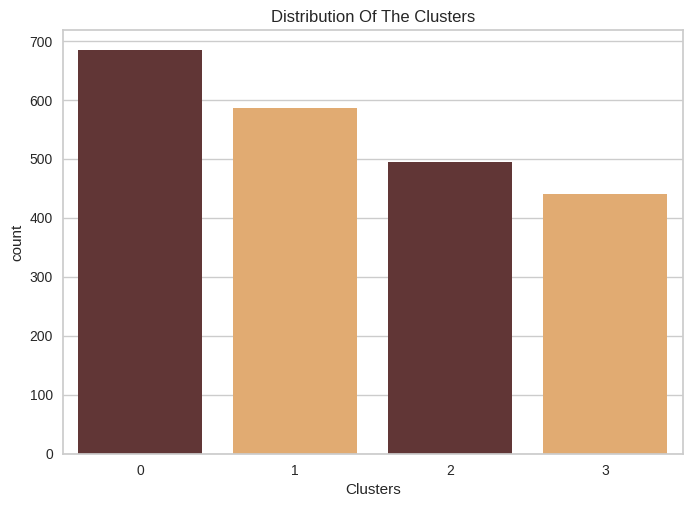

In [44]:
pl = sns.countplot(x=df['Clusters'], palette=(["#682F2F","#F3AB60","#682F2F","#F3AB60"]))
pl.set_title("Distribution Of The Clusters")
plt.show()

The clusters seem to be fairly distributed, Now We will divide them based on Income and spending capacity

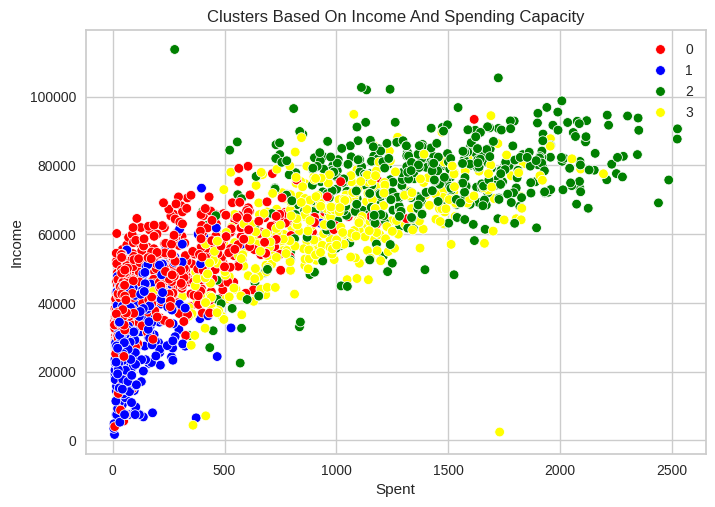

In [45]:
pl = sns.scatterplot(x=df['Spent'],y=df['Income'],hue=df['Clusters'],palette=(["red","blue","green","yellow"]))
pl.set_title("Clusters Based On Income And Spending Capacity")
plt.legend()
plt.show()

In [46]:
print(df['Income'].describe(), df['Spent'].describe())

count      2205.000000
mean      51622.094785
std       20713.063826
min        1730.000000
25%       35196.000000
50%       51287.000000
75%       68281.000000
max      113734.000000
Name: Income, dtype: float64 count    2205.000000
mean      606.821769
std       601.675284
min         5.000000
25%        69.000000
50%       397.000000
75%      1047.000000
max      2525.000000
Name: Spent, dtype: float64


Cluster Classification As Per Their Income & Spending Capacity:

**Cluster 0 (Red): Low Income, Low Spent**

This group is concentrated in the lower range of both Income and Spent, indicating customers with limited financial capacity who also tend to spend less.

**Cluster 1 (Blue):Very Low Income, Low Spent**

Despite having low income, this cluster spends moderately to highly, potentially indicating aspirational or debt-driven spending behavior.

**Cluster 2 (Green):High Income, High Spent**

This group occupies the mid-to-upper range of income but does not correspondingly increase their spending, showing a conservative or balanced spending pattern.

**Cluster 3 (Yellow):Moderate to High Income, Moderate Spent**

Customers in this cluster have high income and high spent; they're likely the most profitable segment, showing a direct relationship between their earning and spending.

Spending Nature Of Clusters Based On Different Items

In [47]:
cluster_0_df = df[df['Clusters'] == 0]
spending_cols = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
cluster_0_spending = cluster_0_df[spending_cols].mean()
print("Average spending of Cluster 0 customers:")
print(cluster_0_spending)

Average spending of Cluster 0 customers:
Wines     160.323099
Fruits      7.745614
Meat       49.356725
Fish       10.847953
Sweets      7.646199
Gold       24.467836
dtype: float64


In [48]:
cluster_1_df = df[df['Clusters'] == 1]
spending_cols = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
cluster_1_spending = cluster_1_df[spending_cols].mean()
print("Average spending of Cluster 1 customers:")
print(cluster_1_spending)

Average spending of Cluster 1 customers:
Wines     31.655877
Fruits     6.187394
Meat      23.107325
Fish       8.442930
Sweets     6.293015
Gold      15.802385
dtype: float64


In [49]:
cluster_2_df = df[df['Clusters'] == 2]
spending_cols = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
cluster_2_spending = cluster_2_df[spending_cols].mean()
print("Average spending of Cluster 2 customers:")
print(cluster_2_spending)

Average spending of Cluster 2 customers:
Wines     608.032389
Fruits     64.342105
Meat      459.170040
Fish       94.813765
Sweets     65.129555
Gold       75.530364
dtype: float64


In [50]:
cluster_3_df = df[df['Clusters'] == 3]
spending_cols = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']
cluster_3_spending = cluster_3_df[spending_cols].mean()
print("Average spending of Cluster 3 customers:")
print(cluster_3_spending)

Average spending of Cluster 3 customers:
Wines     560.186364
Fruits     39.781818
Meat      205.361364
Fish       54.634091
Sweets     42.545455
Gold       76.868182
dtype: float64


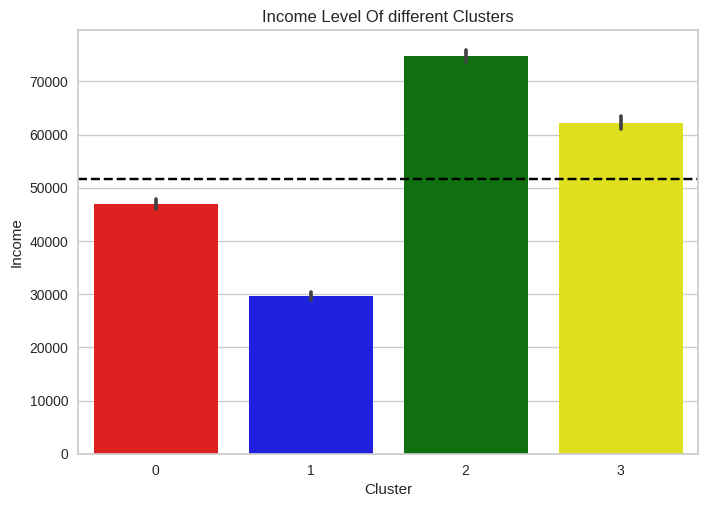

In [51]:
sns.barplot(x='Clusters', y='Income', data=df, palette=(["red","blue","green","yellow"]))
mean_income = df['Income'].mean()
plt.axhline(mean_income, color='black', linestyle='--', label=f'Mean Income: {mean_income:.2f}')
plt.title('Income Level Of different Clusters')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.show()

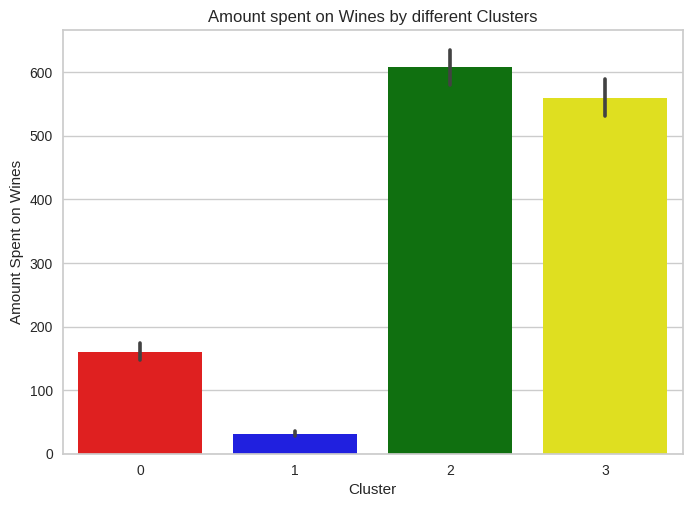

In [52]:
sns.barplot(x='Clusters', y='Wines', data=df, palette=(["red","blue","green","yellow"]))
plt.title('Amount spent on Wines by different Clusters')
plt.xlabel('Cluster')
plt.ylabel('Amount Spent on Wines')
plt.show()

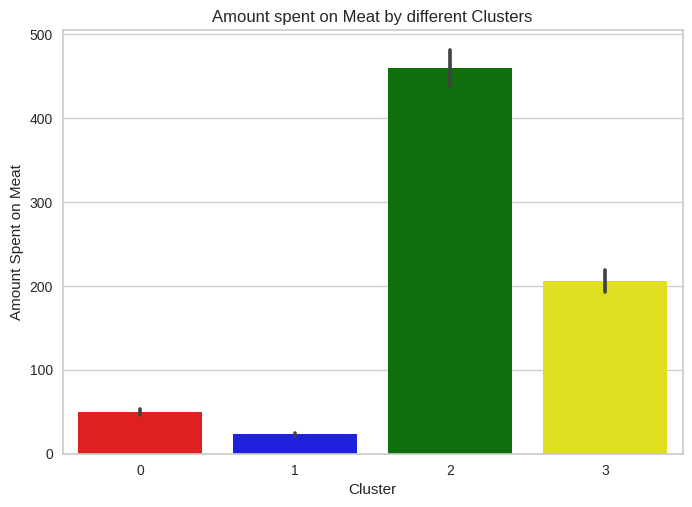

In [53]:
sns.barplot(x='Clusters', y='Meat', data=df, palette=(["red","blue","green","yellow"]))
plt.title('Amount spent on Meat by different Clusters')
plt.xlabel('Cluster')
plt.ylabel('Amount Spent on Meat')
plt.show()

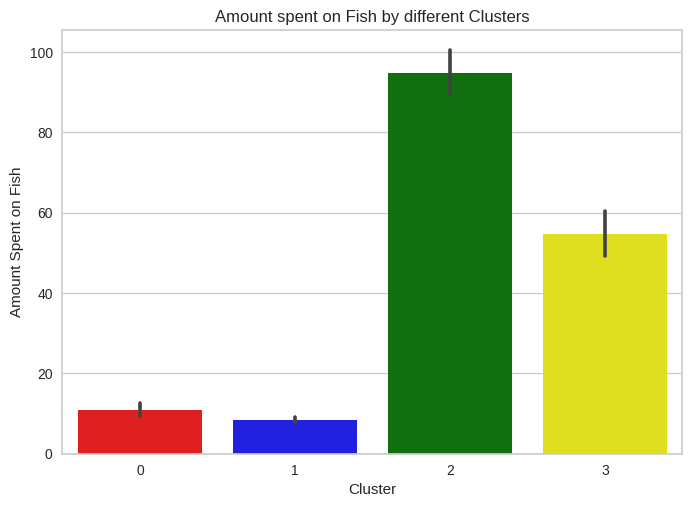

In [54]:
sns.barplot(x='Clusters', y='Fish', data=df, palette=(["red","blue","green","yellow"]))
plt.title('Amount spent on Fish by different Clusters')
plt.xlabel('Cluster')
plt.ylabel('Amount Spent on Fish')
plt.show()

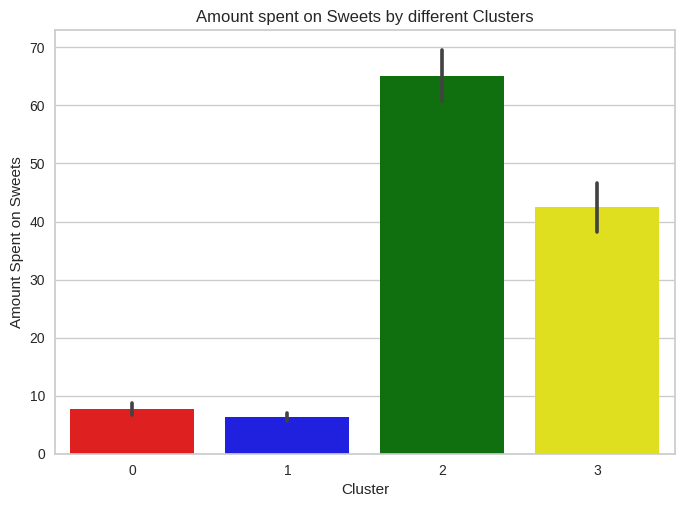

In [55]:
sns.barplot(x='Clusters', y='Sweets', data=df, palette=(["red","blue","green","yellow"]))
plt.title('Amount spent on Sweets by different Clusters')
plt.xlabel('Cluster')
plt.ylabel('Amount Spent on Sweets')
plt.show()

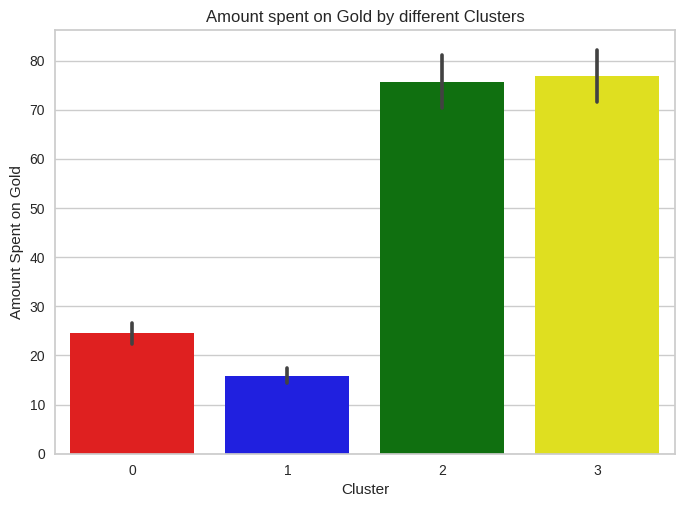

In [56]:
sns.barplot(x='Clusters', y='Gold', data=df, palette=(["red","blue","green","yellow"]))
plt.title('Amount spent on Gold by different Clusters')
plt.xlabel('Cluster')
plt.ylabel('Amount Spent on Gold')
plt.show()

**Further Observing The Spending Nature Of Different Clusters we Concluded That:**

## **Cluster 0 (Red)**
Income: Moderately below average (~$47,000).

Spending Habits:

Wines, Meat, Gold, Sweets, Fish: Low spending in all these categories.

Conclusion: Cluster 0 represents a group with modest income and conservative spending across all luxury and discretionary items.

# **Cluster 1 (Blue)**
Income: Lowest income group (~$30,000).

Spending Habits:

Wines, Meat, Gold, Sweets, Fish: Lowest spending across all the categories.

Conclusion: This cluster is likely the most price-conscious with very limited discretionary spending, consistent with its lower income level.

# **Cluster 2 (Green)**
Income: Highest income group (~$75,000).

Spending Habits:
Wines, Meat, Gold, Sweets, Fish: Highest spending in every category.

Conclusion: This cluster is characterized by high affluence and a strong tendency to spend significantly on luxury (gold) and discretionary items (sweets, fish), indicating a premium or luxury-oriented segment.

# **Cluster 3 (Yellow)**
Income: Second highest (~$62,000).

Spending Habits: Wines, & Gold: High spending, nearly equal to Cluster 2. And In Categories Like Meat, Sweets, Fish: Moderate spending, below Cluster 2 but above Clusters 0 and 1.

Conclusion: This group has high income and spends freely on Luxury Items, like gold and Wines, but is a bit more reserved in categories like Meats, sweets and fish compared to the top cluster.

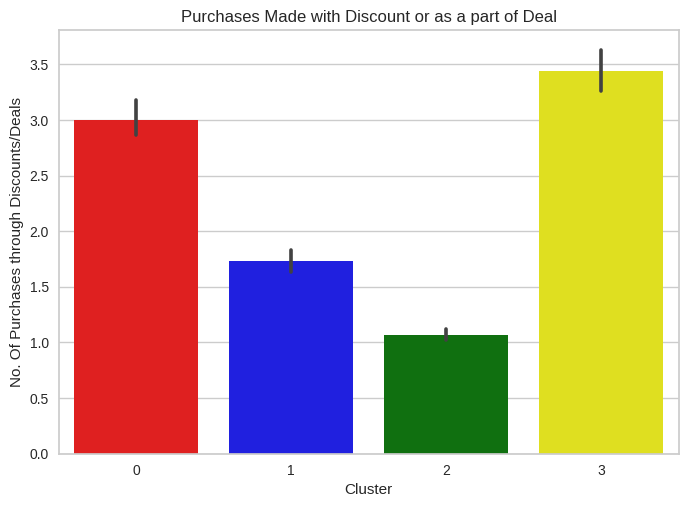

In [57]:
sns.barplot(x='Clusters', y='NumDealsPurchases', data=df, palette=(["red","blue","green","yellow"]))
plt.title('Purchases Made with Discount or as a part of Deal')
plt.xlabel('Cluster')
plt.ylabel('No. Of Purchases through Discounts/Deals')
plt.show()

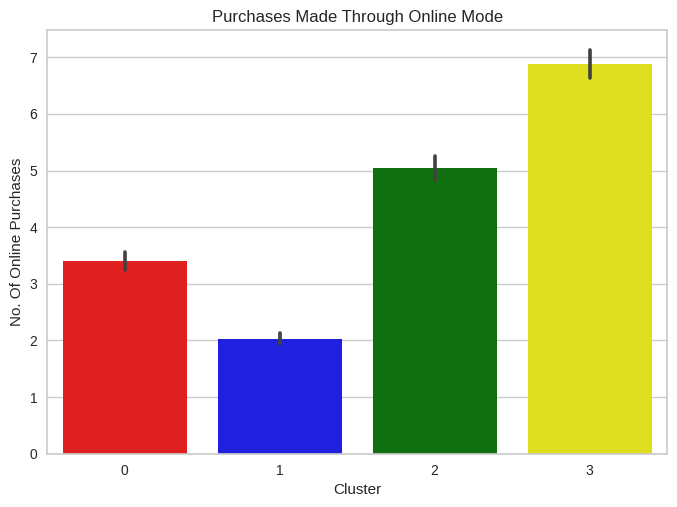

In [58]:
sns.barplot(x='Clusters', y='NumWebPurchases', data=df, palette=(["red","blue","green","yellow"]))
plt.title('Purchases Made Through Online Mode')
plt.xlabel('Cluster')
plt.ylabel('No. Of Online Purchases')
plt.show()

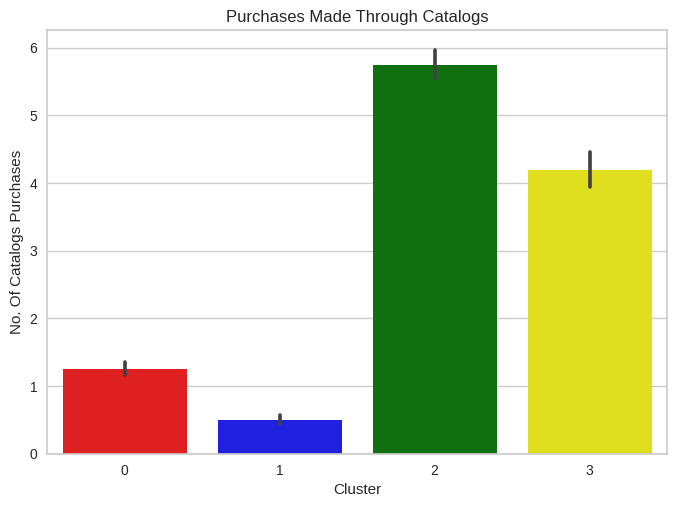

In [59]:
sns.barplot(x='Clusters', y='NumCatalogPurchases', data=df, palette=(["red","blue","green","yellow"]))
plt.title('Purchases Made Through Catalogs')
plt.xlabel('Cluster')
plt.ylabel('No. Of Catalogs Purchases')
plt.show()

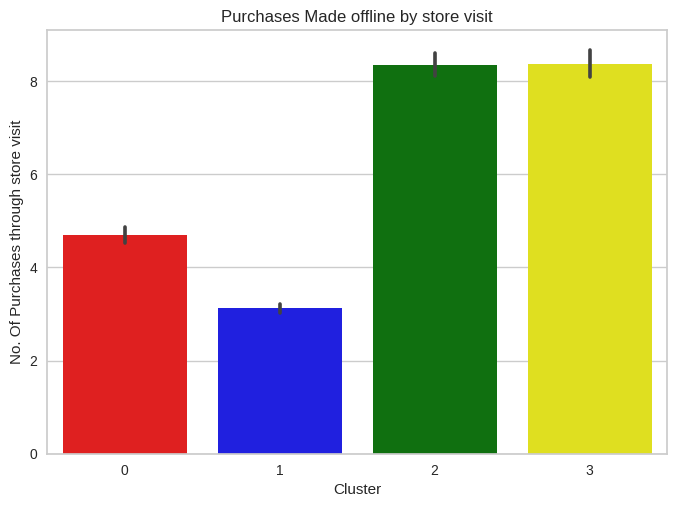

In [60]:
sns.barplot(x='Clusters', y='NumStorePurchases', data=df, palette=(["red","blue","green","yellow"]))
plt.title('Purchases Made offline by store visit')
plt.xlabel('Cluster')
plt.ylabel('No. Of Purchases through store visit')
plt.show()

# **Marketing Strategy For Each Cluster**

**Cluster 0 (Red): Modest Income, Conservative Spending**

Spending: Low across all categories

Strategy: People in This Cluster are more Likely to Shop if there is a discount and also more of they buy things Online, so target them using giving seperate discount to them in Online Platform.

**Cluster 1 (Blue): Lowest Income, Most Price-Sensitive**

Spending: Minimal across all categories and mostly they shop for daily food and they also mostly use online platform to Shop

Strategy: Highlight cost savings and show “lowest price” guarantees on Daily essentials to them through E-Mails

**Cluster 2 (Green): Affluent, Luxury-Oriented Spenders**

Spending: Highest across all sectors including Luxury sector too and they purchases via all channels, but specially through catalogs and in-store.

Strategy: Offer VIP loyalty programs, personalized recommendations, and exclusive access to luxury products launch, Optimize both catalog and online experiences with curated selections and services given to them should feel like premium services like white gloved delivery.

**Cluster 3 (Yellow): High Income, Reserved Luxury Spending**

Spending: High on luxury (gold/wines), moderate on others in comparison to Green Cluster and their purchases are High across all channels, especially online and

Strategy: Send offers highlighting luxury items (gold, wines) personalized to their interests and Suggest luxury add-ons and bundle offers relevant for their segment











# **Personalized Marketing Strategy For Cluster 3 (Yellow)**

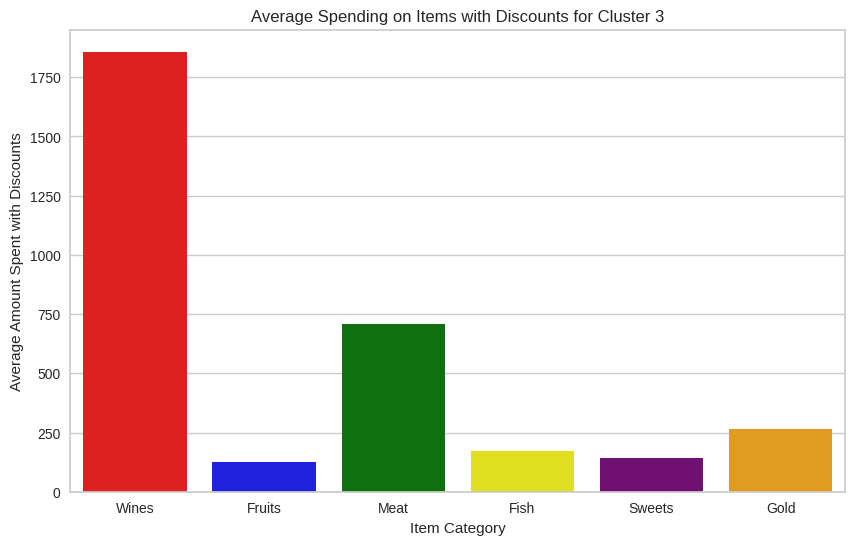

In [62]:
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_3_discount_spending.index, y=cluster_3_discount_spending.values, palette=(["red","blue","green","yellow", "purple", "orange"]))
plt.title('Average Spending on Items with Discounts for Cluster 3')
plt.xlabel('Item Category')
plt.ylabel('Average Amount Spent with Discounts')
plt.show()

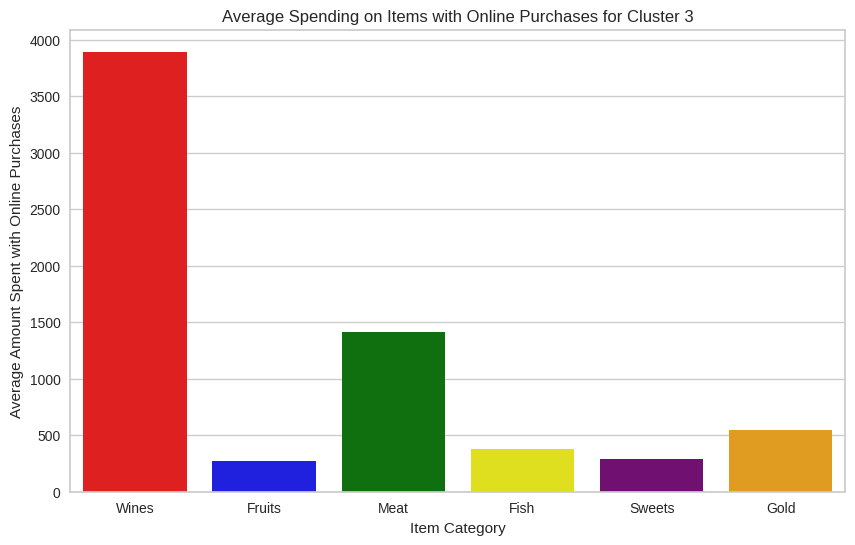

In [64]:
cluster_3_online_spending = cluster_3_df[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']].multiply(cluster_3_df['NumWebPurchases'], axis=0).mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_3_online_spending.index, y=cluster_3_online_spending.values, palette=(["red","blue","green","yellow", "purple", "orange"]))
plt.title('Average Spending on Items with Online Purchases for Cluster 3')
plt.xlabel('Item Category')
plt.ylabel('Average Amount Spent with Online Purchases')
plt.show()

Earlier We Saw Cluster 3 used to purchase a lot through Discount and online purchases, here we found out He purchase mostly Wines Through Discount in online purchases and he spent a lot in Wines, So we can give lucrative personalized discounts through E-Mails like giving discount coupon codes on Wines to cluster 3